<a href="https://colab.research.google.com/github/Amelrich/Capstone-Fall-2020/blob/tchib/romane_maxime_fourier_transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
times = np.load('/content/drive/My Drive/capstone/timeseries.npy') #try to normalize! 

In [ ]:
#Getting the price column of the time series (list of arrays)
times = [times[i][:,0] for i in range(0,len(times))]

In [ ]:
#Complex to Real so that we can apply clustering
import math

def polar(z):
  '''
  return the polar form of a complex number z
  '''
  a= z.real
  b= z.imag
  r = math.hypot(a,b)
  theta = math.atan2(b,a)
  return r

In [ ]:
#take the fourier transform for each time series
from scipy import fftpack

fourier = [fftpack.fft(i) for i in times]
fourier_abs = [abs(fftpack.fft(i)) for i in times] #not a good idea because then ifft wrong
fourier_polar = [polar(i) for i in fourier[0]] #doesn't work well either
frequency_resolution = np.arange(0,len(fourier[0]),1)*2*max(fourier[0])/len(fourier[0])

In [ ]:
#fourier = list(map(lambda x: np.nan if x < 0 else x, fourier))
fourier[0]

array([ 2.41673302e+03-0.00000000e+00j, -1.38750817e+01-4.62486420e+01j,
        1.36136883e+01+1.22311928e+01j, -2.25227963e+00-1.41653776e+01j,
        4.57277814e+00+1.08538346e+01j, -1.44760176e+00-3.75080121e-01j,
       -5.09529880e+00-5.91102419e+00j,  1.43894308e+01+3.06882804e-01j,
        4.77275468e+00+2.24624909e-01j, -1.99347391e+00-2.62440431e-01j,
        3.51034164e-01+9.92650036e-01j, -6.71806927e+00-2.52091574e+00j,
       -6.69314396e-01-1.18673604e+00j,  4.86862851e+00+1.59542897e+00j,
       -2.59580350e+00-9.18151683e-01j, -5.08161926e+00+1.17377472e+00j,
       -1.24154282e+00+5.90773313e-01j, -3.97647679e+00-5.40807273e-01j,
        4.33147243e+00+7.71710942e-03j,  4.23938623e-01-1.74803537e+00j,
       -1.76125908e+00-5.37021050e+00j, -7.15074395e-01-2.00442890e+00j,
       -1.57772669e+00-8.50907615e-01j, -1.73361966e+00-1.74270695e+00j,
       -1.75400065e+00+1.76549127e+00j,  1.41352888e+00+2.21621705e+00j,
       -6.57033202e-01-1.37856214e+00j,  1.03587065

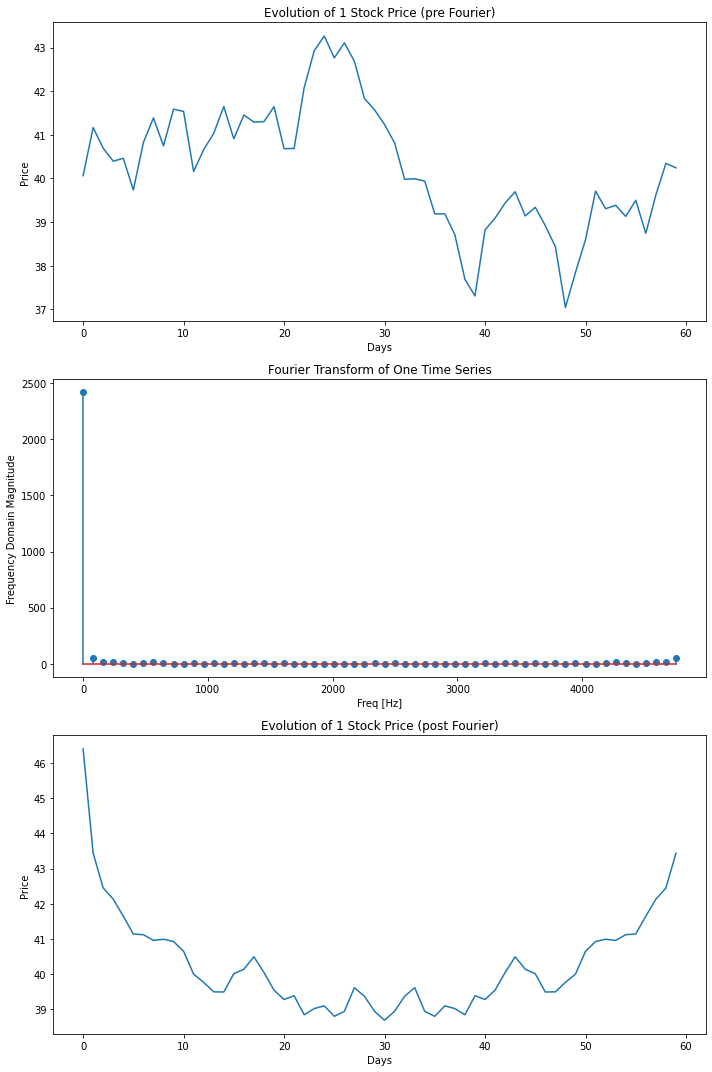

In [ ]:
#Plot an example
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, 1, figsize = (10,15))

#Original Time Series
ax[0].plot(times[0])
ax[0].set_title('Evolution of 1 Stock Price (pre Fourier)')
ax[0].set_xlabel('Days')
ax[0].set_ylabel('Price')

#Fourier Transform
ax[1].stem(frequency_resolution, fourier[0])
ax[1].set_title('Fourier Transform of One Time Series')
ax[1].set_xlabel('Freq [Hz]')
ax[1].set_ylabel('Frequency Domain Magnitude')

#Inverse Fourier Transform (Sanity Check)
ax[2].plot(fftpack.ifft(fourier[0]))
ax[2].set_title('Evolution of 1 Stock Price (post Fourier)')
ax[2].set_xlabel('Days')
ax[2].set_ylabel('Price')

plt.tight_layout()
plt.show()

In [ ]:
!pip install tslearn

     |████████████████████████████████| 778kB 2.8MB/s 


In [ ]:
from tslearn.clustering import TimeSeriesKMeans

km_fourier = TimeSeriesKMeans(n_clusters=10, 
                              #metric="dtw", 
                              max_iter=5,random_state=0).fit([i.real for i in fourier])
clusters_fourier = km_fourier.predict([i.real for i in fourier])

In [ ]:
from sklearn.clustering import KMeans

ModuleNotFoundError: ignored